<a href="https://colab.research.google.com/github/zozo4215/Colab-1/blob/main/Selenium_%E7%B6%B2%E7%AB%99%E7%88%AC%E5%8F%96_PTT_%E5%80%99%E9%81%B8%E4%BA%BA%E7%B6%B2%E8%B7%AF%E8%81%B2%E6%B5%AA%E6%96%87%E5%AD%97%E6%8E%A2%E5%8B%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/selenium')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/selenium'

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
#!cp /usr/lib/chromium-browser/chromedriver /usr/bin

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.common.keys import Keys
import requests

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
# 預設語言
chrome_options.add_argument("--lang=zh-TW.UTF-8")
driver = webdriver.Chrome('chromedriver', options=chrome_options)
driver.implicitly_wait(10)
driver.close() 

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# 1.先抓標題跟網址

In [ ]:
contens=[]
# 寫成函式,更改名稱及頁數
def serach_name( N = '林佳龍 ' , X = 1 ):
  driver = webdriver.Chrome('chromedriver', options=chrome_options)
  driver.get("https://www.ptt.cc/bbs/Gossiping/index.html")
  #點擊已滿18歲按鈕
  driver.find_element(By.XPATH,'/html/body/div[2]/form/div[1]/button').click()
  driver.find_element(By.CLASS_NAME, 'query').send_keys( N +Keys.ENTER) #輸入搜尋名稱,按下enter
  contens=[]
  for i in range( X ):
    soup = BeautifulSoup(driver.page_source)
    title = soup.find_all('div',{'class' :'r-ent'})
    for j in title:
      title_list = j.find('div','title').text.replace('\n','')
      link_list = 'https://www.ptt.cc/' + j.find('a')['href']
      c = [ title_list, link_list ]
      #print(c)
      contens.append(c)
    #點選上一頁按鈕
    driver.find_element(By.LINK_TEXT,'‹ 上頁').click()
  
  driver.quit()
  colname = ['標題', '網址']
  df = pd.DataFrame(contens, columns = colname)
  df.index=df.index+1
  df.to_csv( 'PTT爬蟲.csv', index=False, encoding='utf-8-sig')
  #return df

In [ ]:
serach_name(X=5)

# 2.抓取內文


## 方法1.不存取回文引用部分(綠字部分)

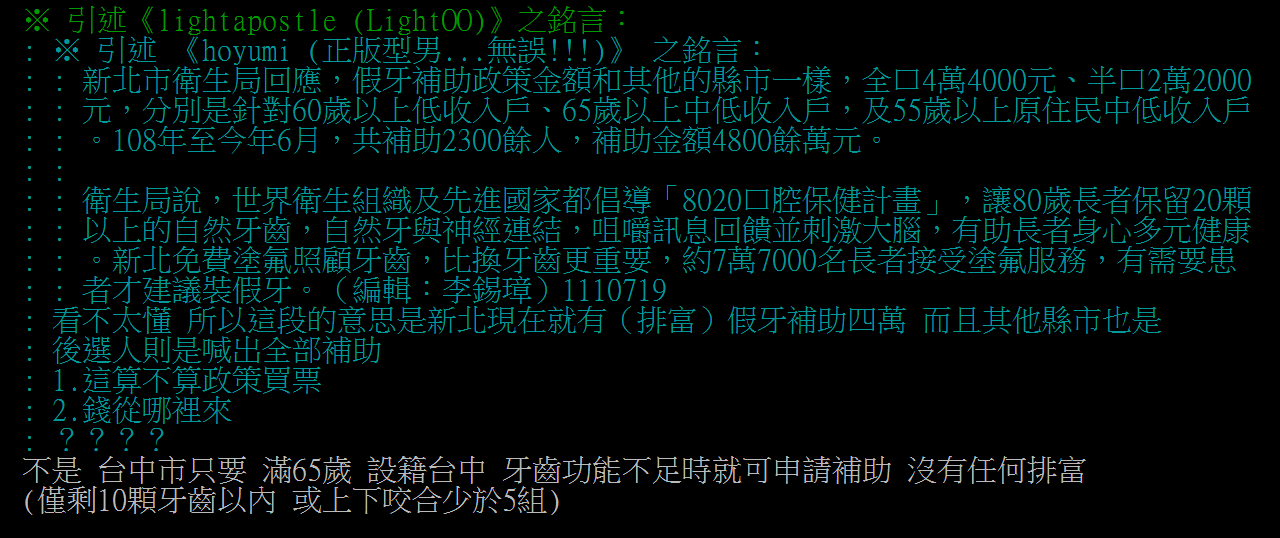

In [ ]:
df = pd.read_csv( 'PTT爬蟲.csv')
link = list(df['網址'])
content_list=[]
for i in range(len(link)):
    driver = webdriver.Chrome('chromedriver', options=chrome_options)
    driver.get(link[i])
    print(link[i])
    soup2 = BeautifulSoup(driver.page_source)
    #如果有顯示已滿18歲選項就點選
    if soup2.find_all('div',{'class' :'over18-notice'}):
      driver.find_element(By.XPATH,'/html/body/div[2]/form/div[1]/button').click()
      soup2 = BeautifulSoup(driver.page_source)
    else:
      pass
    main_content = soup2.find(id='main-content')
    #提取 Beautiful Soup 中元素正下方的所有文本,使用該find_all(text=True, recursive=False)方法。
    conent_list = main_content.find_all(text=True, recursive=False)
    content = ''
    for row in conent_list:
      #print(row.strip())
      # strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列
      content += row.strip().replace('\n','').replace('--','')
    print(content)
    content_list.append(content)
df['內文'] = content_list
df.to_csv( 'PTT爬蟲.csv', index=False, encoding='utf-8-sig')

https://www.ptt.cc//bbs/Gossiping/M.1658725273.A.6AE.html
講真的 好恐怖喔新北市人口這麼多超過一半以上的人支持侯上次選舉能打的已經打到沒什麼好打了假如2024他真的出來…就算他不想，那黃袍也是要直接加身了烙跑市長已經不重要了，反正大家都烙跑怎麼想都想不到能打敗他的議題我這邊先恭喜侯好了
https://www.ptt.cc//bbs/Gossiping/M.1658724482.A.BC4.html
我要是蘇貞昌爽死其一上次新北市長選舉大敗這次有人敗的比我慘 解套其二蔡英文領導選將安排 若失利過錯不在我選後蔡力量大幅縮水進可攻謀取總統提名退可守院長實權更大
https://www.ptt.cc//bbs/Gossiping/M.1658723815.A.A34.html
之前有記者問阿北民眾黨會不會派人出來選新北阿北很妙的說之前不知道民進黨要派誰出來他也不敢亂派人重點任內人才也不多但現在知道民進黨要派阿龍出來選阿北很開心的說那他就不用擔心派誰出來了因為兩邊都是好朋友但現在民調看起來似乎開始懂阿北當時的想法了
https://www.ptt.cc//bbs/Gossiping/M.1658723641.A.AA0.html
民調侯友宜57%勝林佳龍21% 林辦：朱立倫也曾差點翻盤2022-07-25 12:06 聯合報／記者張睿廷／新北即時報導本報民調今日出爐，新北市長侯友宜支持度為57%，民進黨新北市長參選人林佳龍支持度21%，差距達36%。林佳龍競選辦公室發言人李坤城今早受訪時表示，林佳龍對民調是平常心看待，且2014年國民黨主席朱立倫也曾在民調大幅領先立法院長游錫堃，最後差距卻不到1%，他們會朝這個方向努力。李坤城指出，林佳龍對所有民調都是平常心看待，大家也知道新北市這場戰役是相當艱難，所以黨中央才會徵召林佳龍來參選新北市長。李坤城說，不過距離選戰還有130多天，大家不要忘記了，朱立倫在2014年也也曾在新北市長之戰中，大幅度領先游錫堃，但最後結果只差不到1%，約兩萬多票，他們會朝這個方向繼續努力。2014游錫堃差點戰贏朱立倫2022林佳龍全力逆轉侯友宜
https://www.ptt.cc//bbs/Gossiping/M.1658721848.A.B6F.html
避談最新民調落後36%？林佳龍取消聯

## 方法2.將內文全部抓下來

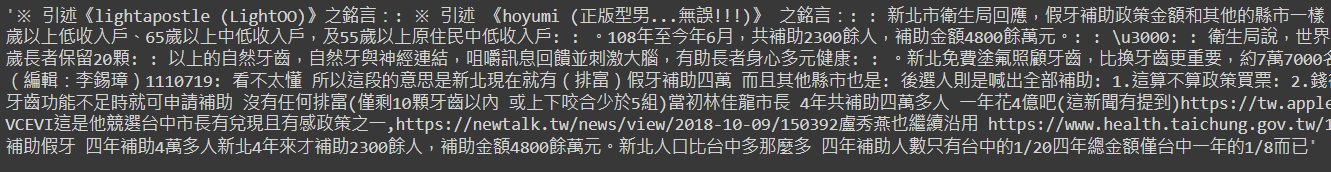

In [ ]:
df = pd.read_csv( 'PTT爬蟲.csv')
link = list(df['網址'])
content_list=[]
for i in range(len(link)):
    driver = webdriver.Chrome('chromedriver', options=chrome_options)
    driver.get(link[i])
    soup2 = BeautifulSoup(driver.page_source)
    if soup2.find('over18-notice'):
      driver.find_element(By.XPATH,'/html/body/div[2]/form/div[1]/button').click()
      soup2 = BeautifulSoup(driver.page_source)
    else:
      pass
    all_text = soup2.find_all('div', {'id': 'main-container'})
    for i in all_text:
      # 以--切割，抓最後一個--前的所有內容
      text = i.text.split("--")[:-1]
    # 將前面的所有內容合併成一個
    one_text = "--".join(text)
    # 以\n切割，第一行標題不要
    texts = one_text.split("\n")[2:]
    # 將每一行合併
    content = "\n".join(texts).replace('\n','')
    content_list.append(content)
df['內文'] = content_list
df.to_csv( 'PTT爬蟲.csv', index=False, encoding='utf-8-sig')

# 3.文字分析

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter
from PIL import Image
import numpy as np

In [ ]:
!wget -O dict.txt.big.txt https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big

--2022-07-25 16:18:01--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘dict.txt.big.txt’

dict.txt.big.txt    100%[===================>]   8.18M  41.5MB/s    in 0.2s    

2022-07-25 16:18:02 (41.5 MB/s) - ‘dict.txt.big.txt’ saved [8583143/8583143]



In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/NLPdata')

In [ ]:
with open('stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:
#with open('stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')
jieba.set_dictionary('dict.txt.big.txt')   

## 標題文字探勘

In [ ]:
title_list=df['標題']

In [ ]:
terms = []
for text in title_list:
  for t in jieba.cut(text, cut_all=False):
      if t not in stops:
          terms.append(t)
  diction = Counter(terms)

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/NLPdata/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/NLPdata/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.u9447dcadbe3dbffe734a5ef0ce14eb5c.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u9447dcadbe3dbffe734a5ef0ce14eb5c.cache
Loading model cost 1.391 seconds.
DEBUG:jieba:Loading model cost 1.391 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


[(' ', 228), ('新聞', 100), ('林佳龍', 65), ('Re', 49), ('「', 34), ('」', 28), ('張博洋', 27), ('道歉', 17), ('新北', 16), ('當選', 13)]


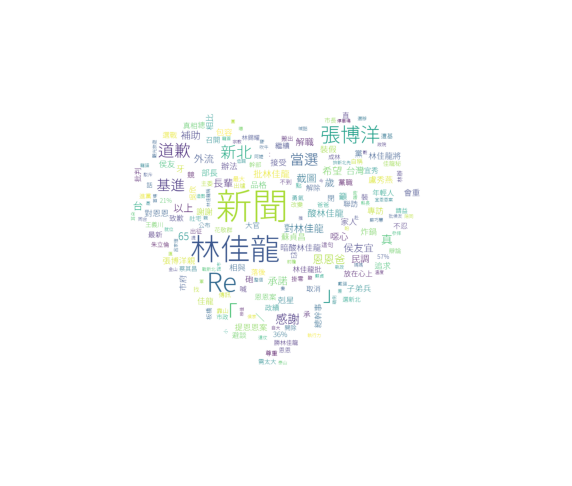

In [ ]:
diction = Counter(terms)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
print(diction.most_common(10))
mask = np.array(Image.open("heart.png")) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("pttCloud.png")

In [ ]:
print(terms)

['Re', ' ', '新聞', ' ', '民調', '侯友宜', '57%', '勝林佳龍', '21%', ' ', '林辦', '朱立倫', 'Re', ' ', '新聞', ' ', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', 'Re', ' ', '新聞', ' ', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', '新聞', ' ', '民調', '侯友宜', '57%', '勝林佳龍', '21%', ' ', '林辦', '朱立倫', '新聞', ' ', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', '新聞', ' ', '林佳龍稱', '前瞻', '停車場', '執行力', '差', ' ', '新北', '駁斥', '新聞', ' ', '林佳龍', '選辦', '就位', ' ', '「', '新北', '這仗', '整個', '執政', '團', '新聞', ' ', '林佳龍', '盼', '推', '宗教', '觀光旅遊', ' ', '喊話', '希望', '新北', '新聞', ' ', '蘇巧慧', '「', '臨時', '」', '陪同', '林佳龍', '泰山', '贈', '匾', 'Re', ' ', '新聞', ' ', '林佳龍', '選新北', '市長', ' ', '蘇貞昌', '最大', '靠山', '新聞', ' ', '林佳龍', '選新北', '市長', ' ', '蘇貞昌', '最大', '靠山', 'Re', ' ', '新聞', ' ', '改變', '需太大', '勇氣', ' ', '林佳龍', '新北', '希望', '新聞', ' ', '改變', '需太大', '勇氣', ' ', '林佳龍', '新北', '希望', '新聞', ' ', '板橋', '參拜', ' ', '林佳', '龍首', '邀', '媽媽', '同台', '新聞', ' ', '戰新北', '林佳龍', '今', '赴', '政院', '蘇貞昌', '請益', 'Re', ' ', '新聞', ' ', '／', '市政', '辯論', '不到', '

In [ ]:
terms_drop = [i for i in terms if i not in['Re', '問卦','卦', '新聞', ' ', '／', '「', '」']] 

In [ ]:
print(terms_drop)

['民調', '侯友宜', '57%', '勝林佳龍', '21%', '林辦', '朱立倫', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', '民調', '侯友宜', '57%', '勝林佳龍', '21%', '林辦', '朱立倫', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', '林佳龍稱', '前瞻', '停車場', '執行力', '差', '新北', '駁斥', '林佳龍', '選辦', '就位', '新北', '這仗', '整個', '執政', '團', '林佳龍', '盼', '推', '宗教', '觀光旅遊', '喊話', '希望', '新北', '蘇巧慧', '臨時', '陪同', '林佳龍', '泰山', '贈', '匾', '林佳龍', '選新北', '市長', '蘇貞昌', '最大', '靠山', '林佳龍', '選新北', '市長', '蘇貞昌', '最大', '靠山', '改變', '需太大', '勇氣', '林佳龍', '新北', '希望', '改變', '需太大', '勇氣', '林佳龍', '新北', '希望', '板橋', '參拜', '林佳', '龍首', '邀', '媽媽', '同台', '戰新北', '林佳龍', '今', '赴', '政院', '蘇貞昌', '請益', '市政', '辯論', '不到', '點', '王義川', '成林', '佳龍秘', '市政', '辯論', '不到', '點', '王義川', '成林', '佳龍秘', '拚新北先', '找', '縣長', '林佳龍', '低調', '請益', '蘇貞', '林佳龍', '自稱', '盧秀燕', '剋星', '呂家愷', '自大', '吹牛', '林佳龍', '自稱', '盧秀燕', '剋星', '侯家', '軍', '酸', '應', '林佳龍', '板橋', '阿嬤', '親', '曝', '真相', '蔡其昌', '首場', '造勢', '林佳龍', '盧秀燕', '剋星', '林佳龍', '盧秀燕', '剋星', '蔡其昌', '指市', '批

[('林佳龍', 65), ('張博洋', 27), ('道歉', 17), ('新北', 16), ('當選', 13), ('基進', 13), ('感謝', 9), ('真', 8), ('恩恩爸', 7), ('侯友宜', 6)]


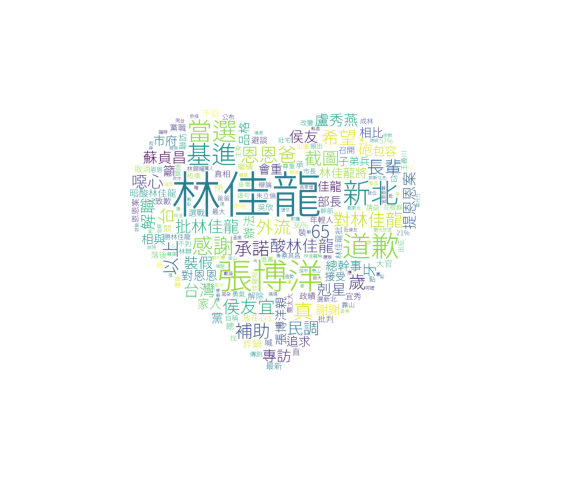

In [ ]:
diction = Counter(terms_drop)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
print(diction.most_common(10))
mask = np.array(Image.open("heart.png")) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("pttCloud2.png")

#### 改善字詞


In [ ]:
with open('user_dict_test.txt', 'r') as f:
  print(f.read())

陳國文
石門水庫
于右任



In [ ]:
# 特殊自加入自定義辭典
with open('user_dict_test.txt', 'a') as f:
  f.write("蔡英文\n")
  f.write("柯文哲\n")
  f.write("苗博雅\n")

In [ ]:
with open('user_dict_test.txt', 'r') as f:
  print(f.read())

陳國文
石門水庫
于右任
蔡英文
柯文哲
苗博雅



In [ ]:
# 在原本stop中加入"垃圾"字串
not_key_word_list = ['Re', '問卦','卦', '新聞', ' ', '／', '「', '」', '是不是']
for i in not_key_word_list:
  stops.append(i)

In [ ]:
#重新分析 (導入自定義辭典)

jieba.set_dictionary('dict.txt.big.txt')
jieba.load_userdict('user_dict_test.txt')


terms3 = []
for text in title_list:
  for t in jieba.cut(text, cut_all=False):
      if t not in stops:
          terms3.append(t)
  diction = Counter(terms3)   

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/NLPdata/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/NLPdata/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.u9447dcadbe3dbffe734a5ef0ce14eb5c.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u9447dcadbe3dbffe734a5ef0ce14eb5c.cache
Loading model cost 1.361 seconds.
DEBUG:jieba:Loading model cost 1.361 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
print(terms3)

['民調', '侯友宜', '57%', '勝林佳龍', '21%', '林辦', '朱立倫', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', '民調', '侯友宜', '57%', '勝林佳龍', '21%', '林辦', '朱立倫', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', '林佳龍稱', '前瞻', '停車場', '執行力', '差', '新北', '駁斥', '林佳龍', '選辦', '就位', '新北', '這仗', '整個', '執政', '團', '林佳龍', '盼', '推', '宗教', '觀光旅遊', '喊話', '希望', '新北', '蘇巧慧', '臨時', '陪同', '林佳龍', '泰山', '贈', '匾', '林佳龍', '選新北', '市長', '蘇貞昌', '最大', '靠山', '林佳龍', '選新北', '市長', '蘇貞昌', '最大', '靠山', '改變', '需太大', '勇氣', '林佳龍', '新北', '希望', '改變', '需太大', '勇氣', '林佳龍', '新北', '希望', '板橋', '參拜', '林佳', '龍首', '邀', '媽媽', '同台', '戰新北', '林佳龍', '今', '赴', '政院', '蘇貞昌', '請益', '市政', '辯論', '不到', '點', '王義川', '成林', '佳龍秘', '市政', '辯論', '不到', '點', '王義川', '成林', '佳龍秘', '拚新北先', '找', '縣長', '林佳龍', '低調', '請益', '蘇貞', '林佳龍', '自稱', '盧秀燕', '剋星', '呂家愷', '自大', '吹牛', '林佳龍', '自稱', '盧秀燕', '剋星', '侯家', '軍', '酸', '應', '林佳龍', '板橋', '阿嬤', '親', '曝', '真相', '蔡其昌', '首場', '造勢', '林佳龍', '盧秀燕', '剋星', '林佳龍', '盧秀燕', '剋星', '蔡其昌', '指市', '批

[('林佳龍', 65), ('張博洋', 27), ('道歉', 17), ('新北', 16), ('當選', 13), ('基進', 13), ('感謝', 9), ('真', 8), ('恩恩爸', 7), ('侯友宜', 6)]


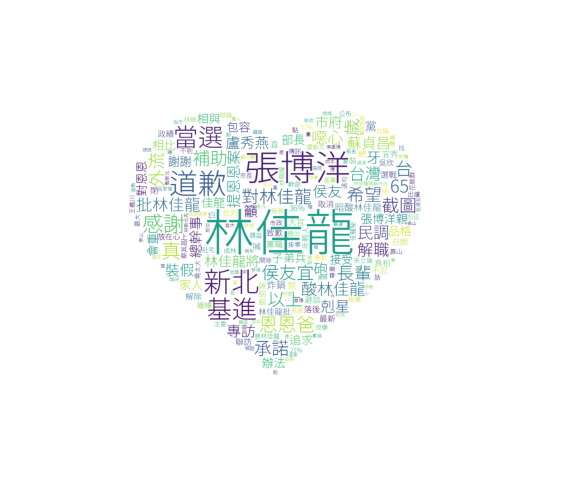

In [ ]:
diction = Counter(terms3)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
mask = np.array(Image.open("heart.png")) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 
wordcloud.generate_from_frequencies(frequencies=diction)
print(diction.most_common(10))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("pttCloud3.png")

## 內文文字探勘

In [ ]:
with open('stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:
#with open('stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')
jieba.set_dictionary('dict.txt.big.txt')   

In [ ]:
terms = []
for text in content_list:
  for t in jieba.cut(text, cut_all=False):
      if t not in stops:
          terms.append(t)
  diction = Counter(terms)

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/NLPdata/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/NLPdata/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.u9447dcadbe3dbffe734a5ef0ce14eb5c.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u9447dcadbe3dbffe734a5ef0ce14eb5c.cache
Loading model cost 1.448 seconds.
DEBUG:jieba:Loading model cost 1.448 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


[(' ', 365), ('林佳龍', 302), ('新北', 245), ('「', 194), ('」', 193), ('市長', 180), ('說', 128), ('表示', 104), ('民進黨', 99), ('真相', 99)]


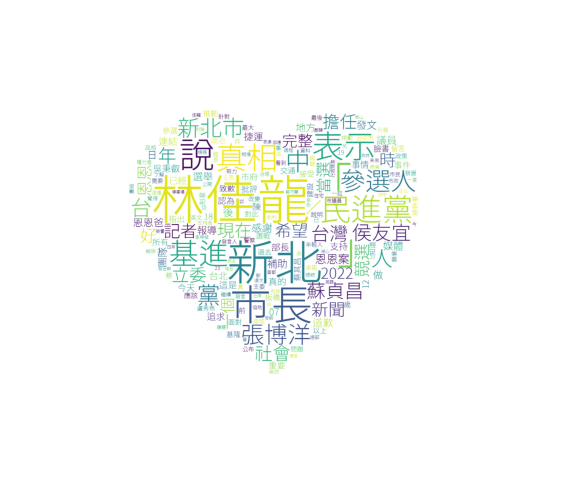

In [ ]:
diction = Counter(terms)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
print(diction.most_common(10))
mask = np.array(Image.open("heart.png")) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("pttCloud.png")

In [ ]:
print(terms)

['講', '真的', ' ', '好', '恐怖', '喔', '新北市', '人口', '超過', '一半', '以上', '人', '支持', '侯', '上次', '選舉', '已經', '沒什麼', '好', '2024', '真的', '不想', '黃袍', '直接', '加身', '烙', '跑', '市長', '已經', '重要', '反正', '烙', '跑', '想不到', '打敗', '議題', '先', '恭喜', '侯好', '蘇貞昌', '爽死', '上次', '新北', '市長', '選舉', '大敗', '這次', '有人', '敗', '我慘', ' ', '解套', '蔡', '英文', '領導', '選將', '安排', ' ', '失利', '過錯', '不在', '選後蔡', '力量', '大幅', '縮水', '進可攻', '謀取', '總統', '提名', '退可守', '院長', '實權', '更大', '之前', '記者', '問阿北民眾', '黨會', '派', '人', '選新北', '阿北', '很妙', '說', '之前', '知道', '民進黨', '派', '不敢', '亂', '派', '人', '重點', '任內', '人才', '現在', '知道', '民進黨', '派', '阿龍', '選阿北', '開心', '說', '不用', '擔心', '派', '兩邊', '好', '朋友', '現在', '民調', '似乎', '懂', '阿北', '當時', '想法', '民調', '侯友宜', '57%', '勝林佳龍', '21%', ' ', '林辦', '朱立倫', '曾', '差點', '翻盤', '2022', '07', '25', ' ', '12', '06', ' ', '聯合報', '／', '記者', '張睿廷', '／', '新北', '即時', '報導', '本報', '民調', '今日', '出爐', '新北', '市長', '侯友宜', '支持', '度為', '57%', '民進黨', '新北', '市長', '參選人', '林佳龍', '支持', '度', '21%', '差距', '達', '36%', '林佳龍', '競選', '辦公室', '發言人', '李坤

In [ ]:
terms_drop = [i for i in terms if i not in['Re', '問卦','卦', '新聞', ' ', '／', '「', '」']] 

In [ ]:
print(terms_drop)

['講', '真的', '好', '恐怖', '喔', '新北市', '人口', '超過', '一半', '以上', '人', '支持', '侯', '上次', '選舉', '已經', '沒什麼', '好', '2024', '真的', '不想', '黃袍', '直接', '加身', '烙', '跑', '市長', '已經', '重要', '反正', '烙', '跑', '想不到', '打敗', '議題', '先', '恭喜', '侯好', '蘇貞昌', '爽死', '上次', '新北', '市長', '選舉', '大敗', '這次', '有人', '敗', '我慘', '解套', '蔡', '英文', '領導', '選將', '安排', '失利', '過錯', '不在', '選後蔡', '力量', '大幅', '縮水', '進可攻', '謀取', '總統', '提名', '退可守', '院長', '實權', '更大', '之前', '記者', '問阿北民眾', '黨會', '派', '人', '選新北', '阿北', '很妙', '說', '之前', '知道', '民進黨', '派', '不敢', '亂', '派', '人', '重點', '任內', '人才', '現在', '知道', '民進黨', '派', '阿龍', '選阿北', '開心', '說', '不用', '擔心', '派', '兩邊', '好', '朋友', '現在', '民調', '似乎', '懂', '阿北', '當時', '想法', '民調', '侯友宜', '57%', '勝林佳龍', '21%', '林辦', '朱立倫', '曾', '差點', '翻盤', '2022', '07', '25', '12', '06', '聯合報', '記者', '張睿廷', '新北', '即時', '報導', '本報', '民調', '今日', '出爐', '新北', '市長', '侯友宜', '支持', '度為', '57%', '民進黨', '新北', '市長', '參選人', '林佳龍', '支持', '度', '21%', '差距', '達', '36%', '林佳龍', '競選', '辦公室', '發言人', '李坤城', '今早', '受訪', '時', '表示', '林佳龍', '民調', 

[('林佳龍', 302), ('新北', 245), ('市長', 180), ('說', 128), ('表示', 104), ('民進黨', 99), ('真相', 99), ('基進', 91), ('參選人', 83), ('中', 81)]


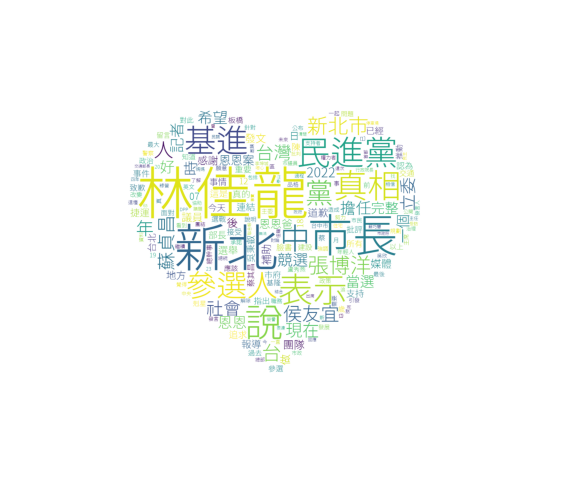

In [ ]:
diction = Counter(terms_drop)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
print(diction.most_common(10))
mask = np.array(Image.open("heart.png")) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("pttCloud2.png")

#### 改善字詞


In [ ]:
with open('user_dict_test.txt', 'r') as f:
  print(f.read())

陳國文
石門水庫
于右任



In [ ]:
# 特殊自加入自定義辭典
with open('user_dict_test.txt', 'a') as f:
  f.write("蔡英文\n")
  f.write("柯文哲\n")
  f.write("苗博雅\n")

In [ ]:
with open('user_dict_test.txt', 'r') as f:
  print(f.read())

陳國文
石門水庫
于右任
蔡英文
柯文哲
苗博雅



In [ ]:
# 在原本stop中加入"垃圾"字串
not_key_word_list = ['Re', '問卦','卦', '新聞', ' ', '／', '「', '」', '是不是']
for i in not_key_word_list:
  stops.append(i)

In [ ]:
#重新分析 (導入自定義辭典)

jieba.set_dictionary('dict.txt.big.txt')
jieba.load_userdict('user_dict_test.txt')


terms3 = []
for text in title_list:
  for t in jieba.cut(text, cut_all=False):
      if t not in stops:
          terms3.append(t)
  diction = Counter(terms3)   

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/NLPdata/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/NLPdata/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.u9447dcadbe3dbffe734a5ef0ce14eb5c.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u9447dcadbe3dbffe734a5ef0ce14eb5c.cache
Loading model cost 1.304 seconds.
DEBUG:jieba:Loading model cost 1.304 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
print(terms3)

['民調', '侯友宜', '57%', '勝林佳龍', '21%', '林辦', '朱立倫', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', '民調', '侯友宜', '57%', '勝林佳龍', '21%', '林辦', '朱立倫', '避談', '最新', '民調', '落後', '36%', '林佳龍', '取消', '聯訪', '林佳龍稱', '前瞻', '停車場', '執行力', '差', '新北', '駁斥', '林佳龍', '選辦', '就位', '新北', '這仗', '整個', '執政', '團', '林佳龍', '盼', '推', '宗教', '觀光旅遊', '喊話', '希望', '新北', '蘇巧慧', '臨時', '陪同', '林佳龍', '泰山', '贈', '匾', '林佳龍', '選新北', '市長', '蘇貞昌', '最大', '靠山', '林佳龍', '選新北', '市長', '蘇貞昌', '最大', '靠山', '改變', '需太大', '勇氣', '林佳龍', '新北', '希望', '改變', '需太大', '勇氣', '林佳龍', '新北', '希望', '板橋', '參拜', '林佳', '龍首', '邀', '媽媽', '同台', '戰新北', '林佳龍', '今', '赴', '政院', '蘇貞昌', '請益', '市政', '辯論', '不到', '點', '王義川', '成林', '佳龍秘', '市政', '辯論', '不到', '點', '王義川', '成林', '佳龍秘', '拚新北先', '找', '縣長', '林佳龍', '低調', '請益', '蘇貞', '林佳龍', '自稱', '盧秀燕', '剋星', '呂家愷', '自大', '吹牛', '林佳龍', '自稱', '盧秀燕', '剋星', '侯家', '軍', '酸', '應', '林佳龍', '板橋', '阿嬤', '親', '曝', '真相', '蔡其昌', '首場', '造勢', '林佳龍', '盧秀燕', '剋星', '林佳龍', '盧秀燕', '剋星', '蔡其昌', '指市', '批

[('林佳龍', 65), ('張博洋', 27), ('道歉', 17), ('新北', 16), ('當選', 13), ('基進', 13), ('感謝', 9), ('真', 8), ('恩恩爸', 7), ('侯友宜', 6)]


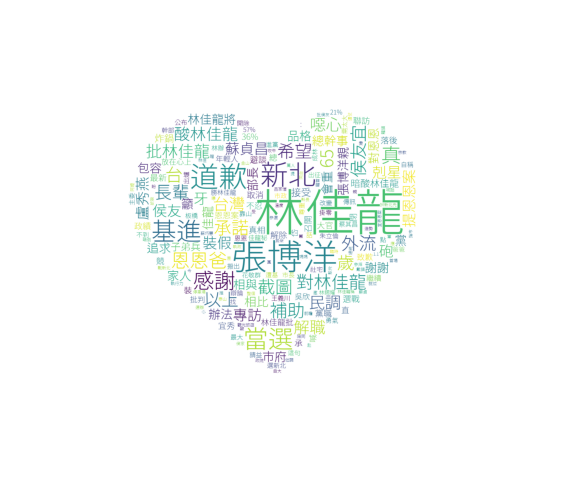

In [ ]:
diction = Counter(terms3)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
mask = np.array(Image.open("heart.png")) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 
wordcloud.generate_from_frequencies(frequencies=diction)
print(diction.most_common(10))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("pttCloud3.png")